In [2]:
from andromeda.util.common import read_pickle, write_pickle
import pandas as pd
import numpy as np

## Build KMean Cluster

In [4]:
output_name = 'keywords02'

In [48]:
returns = pd.read_pickle('sp500_daily_returns.pkl')
sp500_gics = pd.read_pickle('sp500_gics.pkl')

In [5]:
res003 = pd.read_pickle('/Users/aphri/pycharm/data/wv_ticker_mapped_cleaned_new.pkl')
res003.head()

,s,vo,wv,ticker
date,,,,
2018-07-03 18:16:26,centene corporation,reports quarter earnings of per share,"[0.069821596, 0.2268446, -0.1357558, -0.047921...",[CNC]
2014-01-30 13:09:06,nfl,encourage fans shopping to purchase from nfl t...,"[0.07208228, -0.0021257144, 0.2515124, -0.1012...",[NFLX]
2020-11-10 06:07:36,las agencias de turismo se deben reinventar lu...,lets worldwide travel colombia por design,"[0.19914782, 0.078872666, 0.17587417, -0.07582...","[ALK, LVS]"
2019-10-24 23:13:31,oracle blockchain,provide single source of truth for hyperledger...,"[-0.074229, -0.017419994, -0.079432994, -0.071...",[ORCL]
2013-12-02 00:58:41,amazon best selling author callan rush worksho...,fill events,"[-0.17017, 0.029013999, 0.1578735, -0.16875601...",[AMZN]


In [38]:
keywords1 = ['president', 'director', 'executive', ' vice ', 'chief', 'chairman', ' ceo', 'ceo ']

condition1 = False
for kw in keywords1:
    condition1 = condition1 | res003.s.str.contains(kw) | res003.vo.str.contains(kw)

In [39]:
keywords2 = ['name', 'elect', 'promote', 'appoint', 'join', 'add']

condition2 = False
for kw in keywords2:
    condition2 = condition2 | res003.s.str.contains(kw) | res003.vo.str.contains(kw)

ANALYZING: management
                Sharpe  Volatility
roll-5       -0.632106    0.205639
roll-8       -0.301855    0.214934
roll-None    -0.223574    0.157032
roll-2       -0.192767    0.183538
roll-15      -0.144023    0.214530
roll-10      -0.057056    0.221387
roll-13      -0.036011    0.215844
roll-100     -0.015002    0.187552
equal weight  0.000000    0.177921
sector neutral:
                Sharpe  Volatility
roll-5       -0.565696    0.205586
roll-8       -0.226521    0.218136
roll-None    -0.157852    0.157028
roll-2       -0.134709    0.183461
roll-15      -0.109789    0.219422
equal weight  0.000000    0.174735
roll-10       0.024523    0.226120
roll-13       0.048153    0.221739
roll-100      0.052638    0.189295


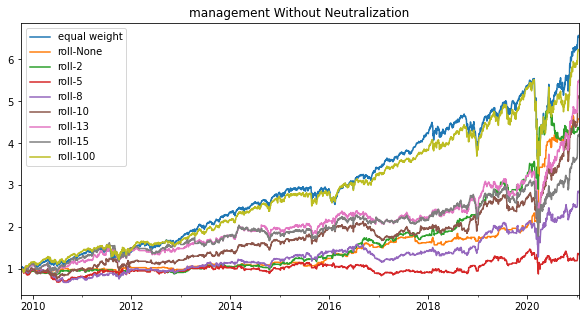

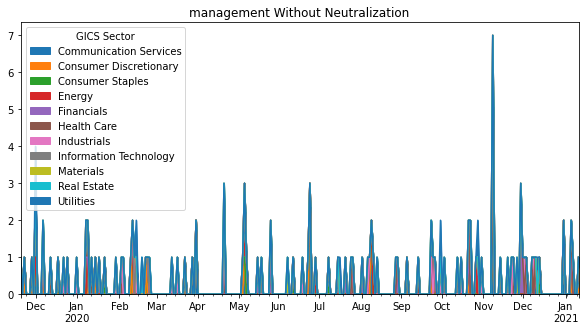

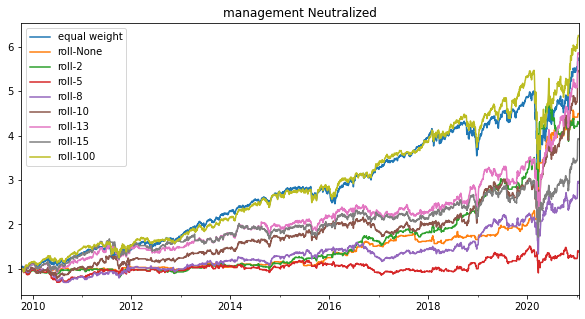

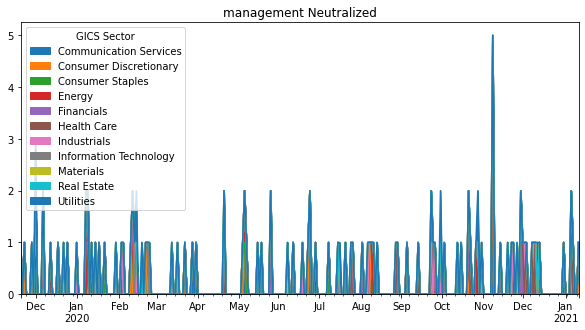

In [49]:
res003kw = res003[condition1 & condition2].copy()
res003kw['factor'] = 'management'

from andromeda.finance.analytics.portfolio import factors_from_cluster
res004kw = factors_from_cluster(res003kw)

import andromeda.finance.analytics.performance as perf
perf.analyze_factor('management', res004kw, returns, sp500_gics)

ANALYZING: management
                Sharpe  Volatility
roll-5       -0.069207    0.217635
roll-100     -0.026380    0.180774
roll-2       -0.023500    0.214390
equal weight  0.000000    0.178069
roll-8        0.027607    0.212607
roll-10       0.179458    0.212226
roll-15       0.191927    0.201016
roll-None     0.196822    0.187433
roll-13       0.235040    0.206277
sector neutral:
                Sharpe  Volatility
roll-100     -0.087525    0.179974
roll-5       -0.026549    0.217431
equal weight  0.000000    0.174880
roll-2        0.029652    0.214041
roll-8        0.035139    0.213825
roll-15       0.115315    0.201796
roll-10       0.146132    0.213493
roll-13       0.228733    0.209262
roll-None     0.244553    0.187118


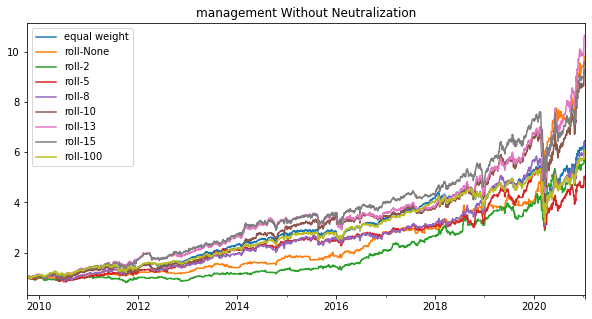

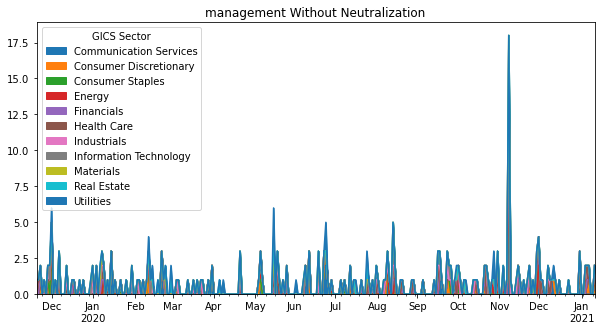

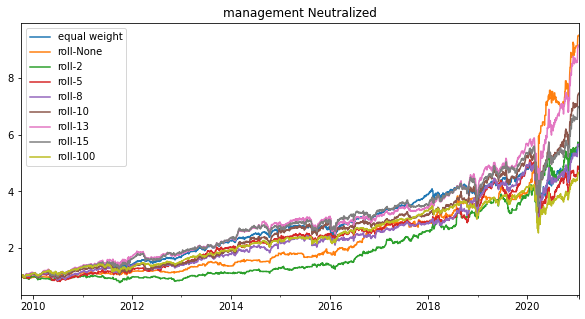

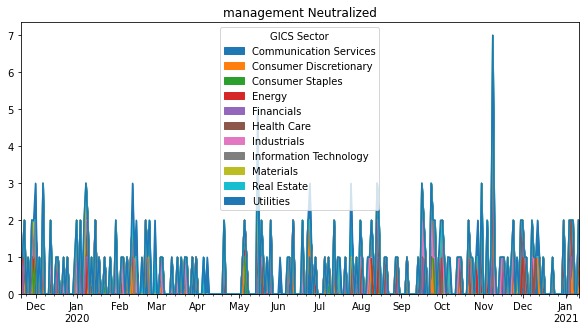

In [50]:
res003kw = res003[condition1].copy()
res003kw['factor'] = 'management'

from andromeda.finance.analytics.portfolio import factors_from_cluster
res004kw = factors_from_cluster(res003kw)

import andromeda.finance.analytics.performance as perf
perf.analyze_factor('management', res004kw, returns, sp500_gics)